In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"F:\Xai_traderx\data\processed\axis_processed.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Date,Close,High,Low,Open,Volume,Close_Return_1D,Close_Return_3D,Return,High_Low_Spread,...,bb_upper,bb_lower,bb_width,Bollinger_%B,bear_score,bull_strength,bear_strength,Momentum,Volatility,next_close
0,2020-07-15,424.799133,442.521933,420.916058,422.160635,43250557,0.021427,-0.029459,0.021427,0.050861,...,454.303081,398.685371,0.130407,0.469522,0.0,0.0,0.0,-17.424042,14.353156,432.117218
1,2020-07-16,432.117218,434.257885,416.634689,430.076123,30183647,0.017227,-0.013748,0.017227,0.040783,...,453.637754,402.198291,0.120209,0.581634,0.0,0.0,0.0,-19.664337,14.293742,431.221161
2,2020-07-17,431.221161,437.991649,422.758035,432.117250,33464985,-0.002074,0.036869,-0.002074,0.035327,...,453.762583,403.671502,0.116839,0.549991,0.0,0.0,0.0,-6.471771,12.168083,432.117218
3,2020-07-20,432.117218,440.879030,427.437595,435.801179,30400586,0.002078,0.017227,0.002078,0.031106,...,453.998923,403.818494,0.116996,0.563939,0.0,0.0,0.0,-6.023743,9.547082,444.264313
4,2020-07-21,444.264313,449.043477,436.597705,438.091197,43147019,0.028111,0.028111,0.028111,0.028014,...,454.422846,403.648464,0.118345,0.799928,0.0,0.0,0.0,28.376343,9.983551,476.872223


In [5]:
print(df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Close_Return_1D',
       'Close_Return_3D', 'Return', 'High_Low_Spread', 'price_gap',
       'return_volatility', 'return_zscore', 'volume_ratio', 'Volume_Z', 'OBV',
       'RSI', 'MACD_Hist', 'ATR', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_12',
       'EMA_50', 'bb_upper', 'bb_lower', 'bb_width', 'Bollinger_%B',
       'bear_score', 'bull_strength', 'bear_strength', 'Momentum',
       'Volatility', 'next_close'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1187 non-null   object 
 1   Close              1187 non-null   float64
 2   High               1187 non-null   float64
 3   Low                1187 non-null   float64
 4   Open               1187 non-null   float64
 5   Volume             1187 non-null   int64  
 6   Close_Return_1D    1187 non-null   float64
 7   Close_Return_3D    1187 non-null   float64
 8   Return             1187 non-null   float64
 9   High_Low_Spread    1187 non-null   float64
 10  price_gap          1187 non-null   float64
 11  return_volatility  1187 non-null   float64
 12  return_zscore      1187 non-null   float64
 13  volume_ratio       1187 non-null   float64
 14  Volume_Z           1187 non-null   float64
 15  OBV                1187 non-null   float64
 16  RSI                1187 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1187.0,8.671247e+02,2.113701e+02,4.007041e+02,7.202369e+02,8.508915e+02,1.041073e+03,1.317300e+03
High,1187.0,8.768015e+02,2.125405e+02,4.125027e+02,7.316207e+02,8.587691e+02,1.055935e+03,1.339650e+03
Low,1187.0,8.570609e+02,2.102936e+02,3.984141e+02,7.109025e+02,8.431134e+02,1.030804e+03,1.305000e+03
Open,1187.0,8.671511e+02,2.112771e+02,4.057322e+02,7.201373e+02,8.523872e+02,1.040647e+03,1.316700e+03
Volume,1187.0,1.190159e+07,8.147721e+06,0.000000e+00,6.830911e+06,9.376433e+06,1.432477e+07,8.961194e+07
Close_Return_1D,1187.0,1.033487e-03,1.740746e-02,-7.570068e-02,-8.576562e-03,8.214745e-04,1.047380e-02,9.027066e-02
Close_Return_3D,1187.0,3.022210e-03,3.015394e-02,-1.186602e-01,-1.438151e-02,3.026456e-03,1.994311e-02,1.270475e-01
Return,1187.0,1.033487e-03,1.740746e-02,-7.570068e-02,-8.576562e-03,8.214745e-04,1.047380e-02,9.027066e-02
High_Low_Spread,1187.0,2.371334e-02,1.172676e-02,0.000000e+00,1.545650e-02,2.121287e-02,2.873887e-02,1.082431e-01
price_gap,1187.0,6.743699e-01,7.119923e+00,-5.630005e+01,-2.493550e+00,9.972191e-01,4.298386e+00,3.672163e+01


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.head()

,date,Close,High,Low,Open,Volume,positive_count,negative_count,neutral_count,avg_sentiment_score,...,SMA_50,EMA_10,EMA_50,EMA_12,EMA_26,RSI_14,MACD,Signal,Volatility,Momentum
49,2020-08-24,1072.344238,1078.008019,1042.200884,1042.536853,18389870,0.0,2.0,1.0,-6.667675e-01,...,1048.585562,1025.204099,1054.382459,1023.134182,1024.227997,48.475442,-1.093815,-9.214172,32.736386,79.294434
50,2020-08-28,1069.896118,1079.975893,1051.176536,1067.448126,19348305,0.0,2.0,0.0,-9.998460e-01,...,1045.239075,1033.329920,1054.990838,1030.328326,1027.610821,49.234122,2.717505,-6.827837,32.122416,78.478271
51,2020-08-31,1071.192139,1102.823505,1056.648439,1084.295871,19250583,0.0,0.0,1.0,-6.124693e-08,...,1042.459937,1040.213960,1055.626183,1036.615066,1030.839067,56.935701,5.776000,-4.307070,35.243832,47.279053
52,2020-09-02,1088.759644,1093.415516,1075.847862,1079.111813,9880841,0.0,1.0,0.0,-9.995025e-01,...,1039.477285,1049.040448,1056.925535,1044.637309,1035.129480,71.688395,9.507829,-1.544090,39.417105,72.142273
53,2020-09-04,1074.504028,1080.359874,1060.200325,1065.576181,11830685,1.0,1.0,0.0,8.826069e-03,...,1036.873823,1053.670190,1057.614887,1049.232189,1038.046113,76.940728,11.186076,1.001943,37.481521,32.303223


In [26]:
df.to_csv(r'F:\Xai_traderx\experiments\hdfc\hdfcdemo.csv', index=False)

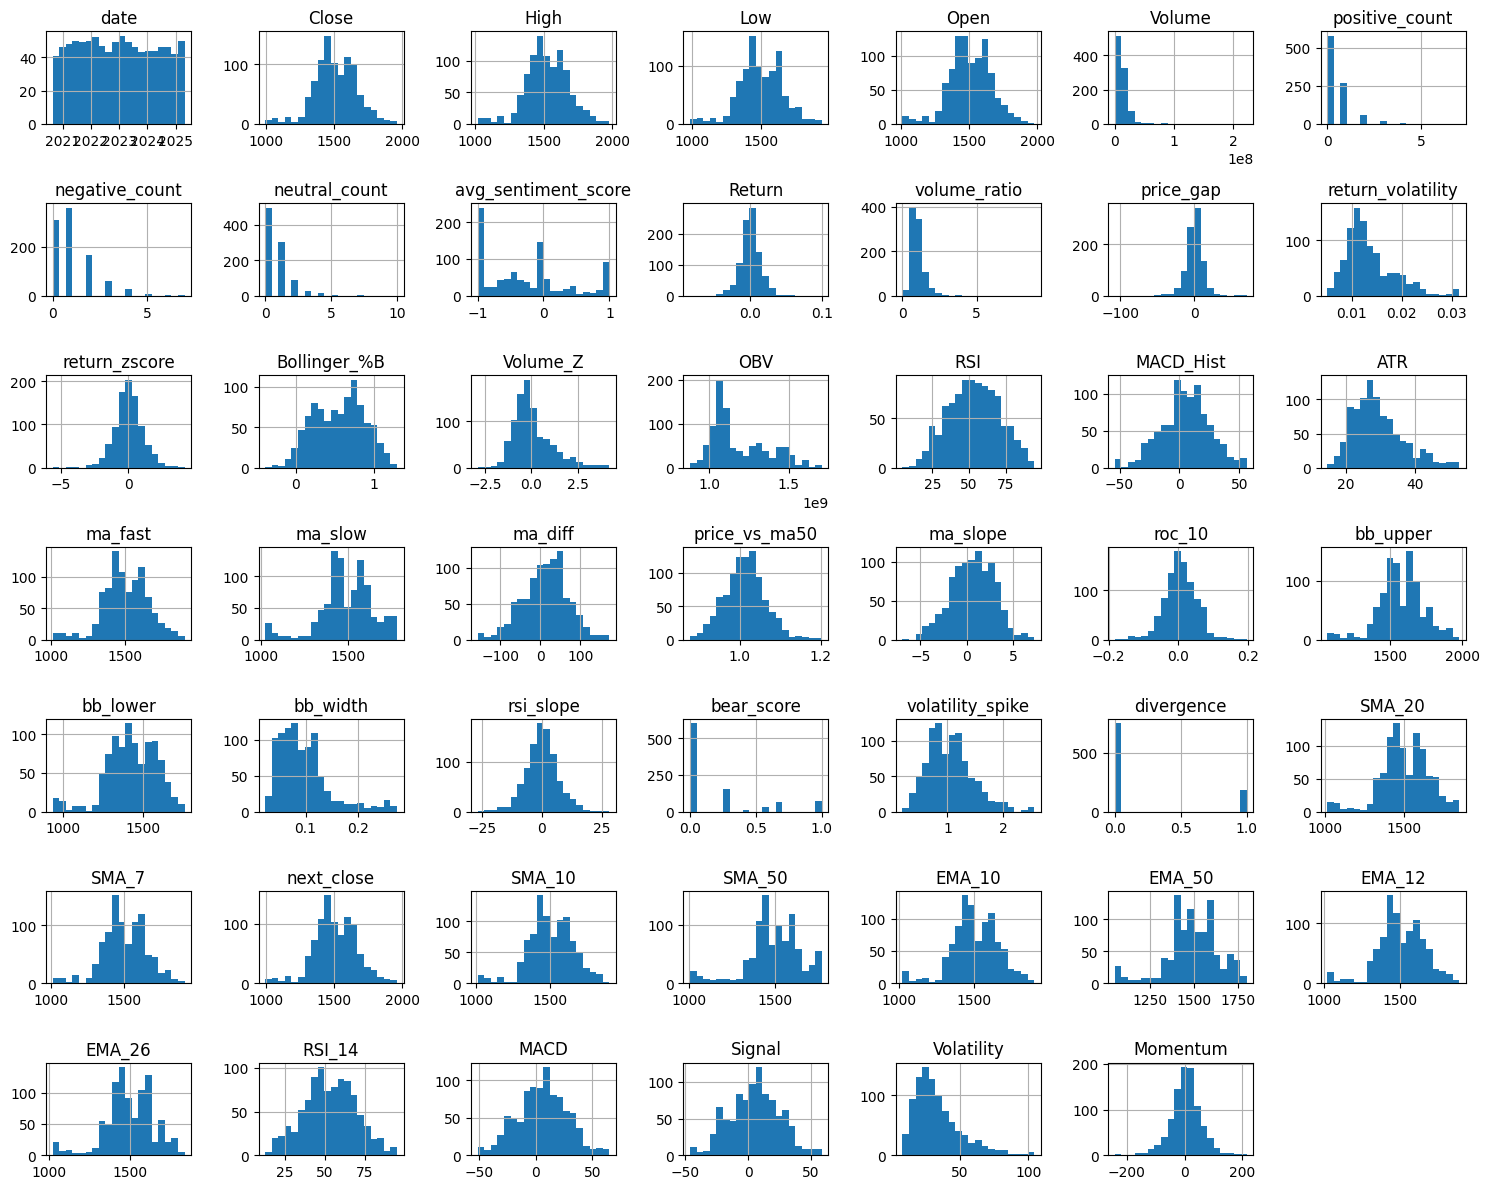

In [12]:
# Plot histograms for numerical columns
df.hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()

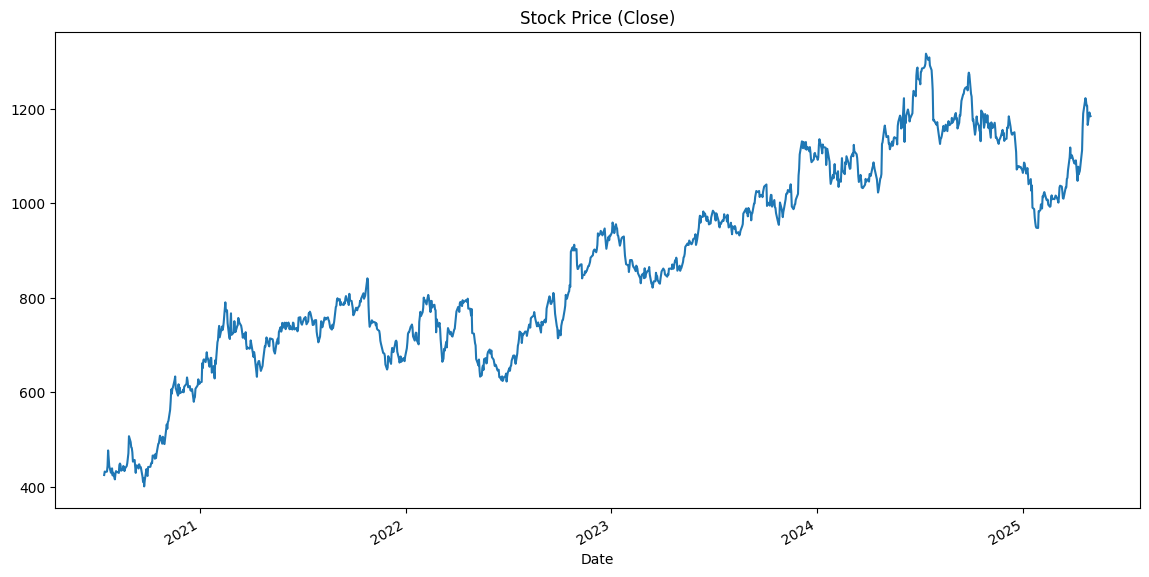

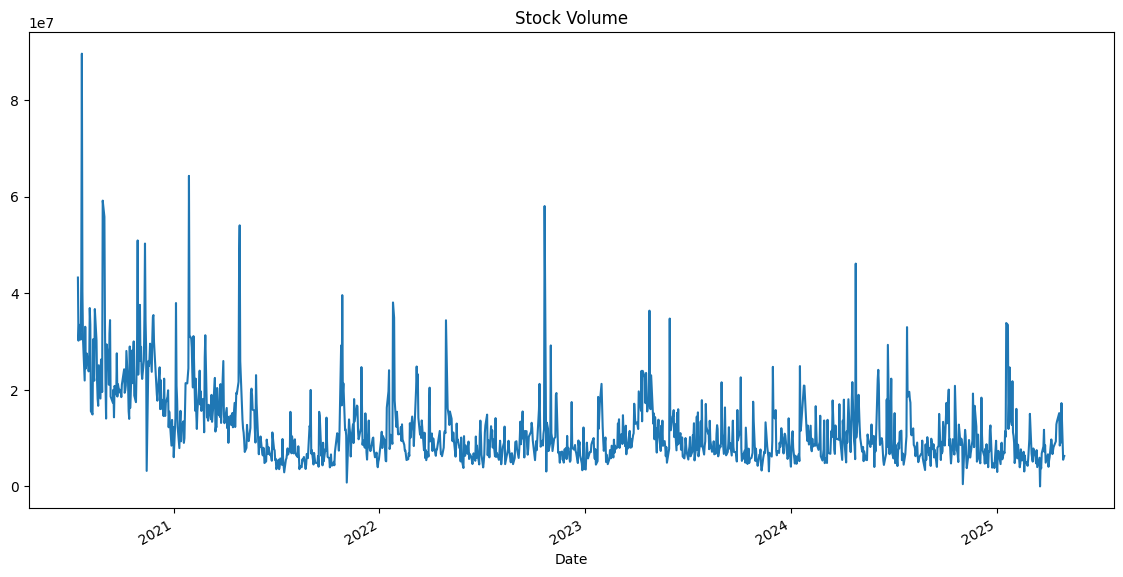

In [13]:
plt.figure(figsize=(14, 7))
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot stock prices (Close)
df['Close'].plot(figsize=(14,7), title="Stock Price (Close)")
plt.show()

# Plot Volume
df['Volume'].plot(figsize=(14,7), title="Stock Volume")
plt.show()

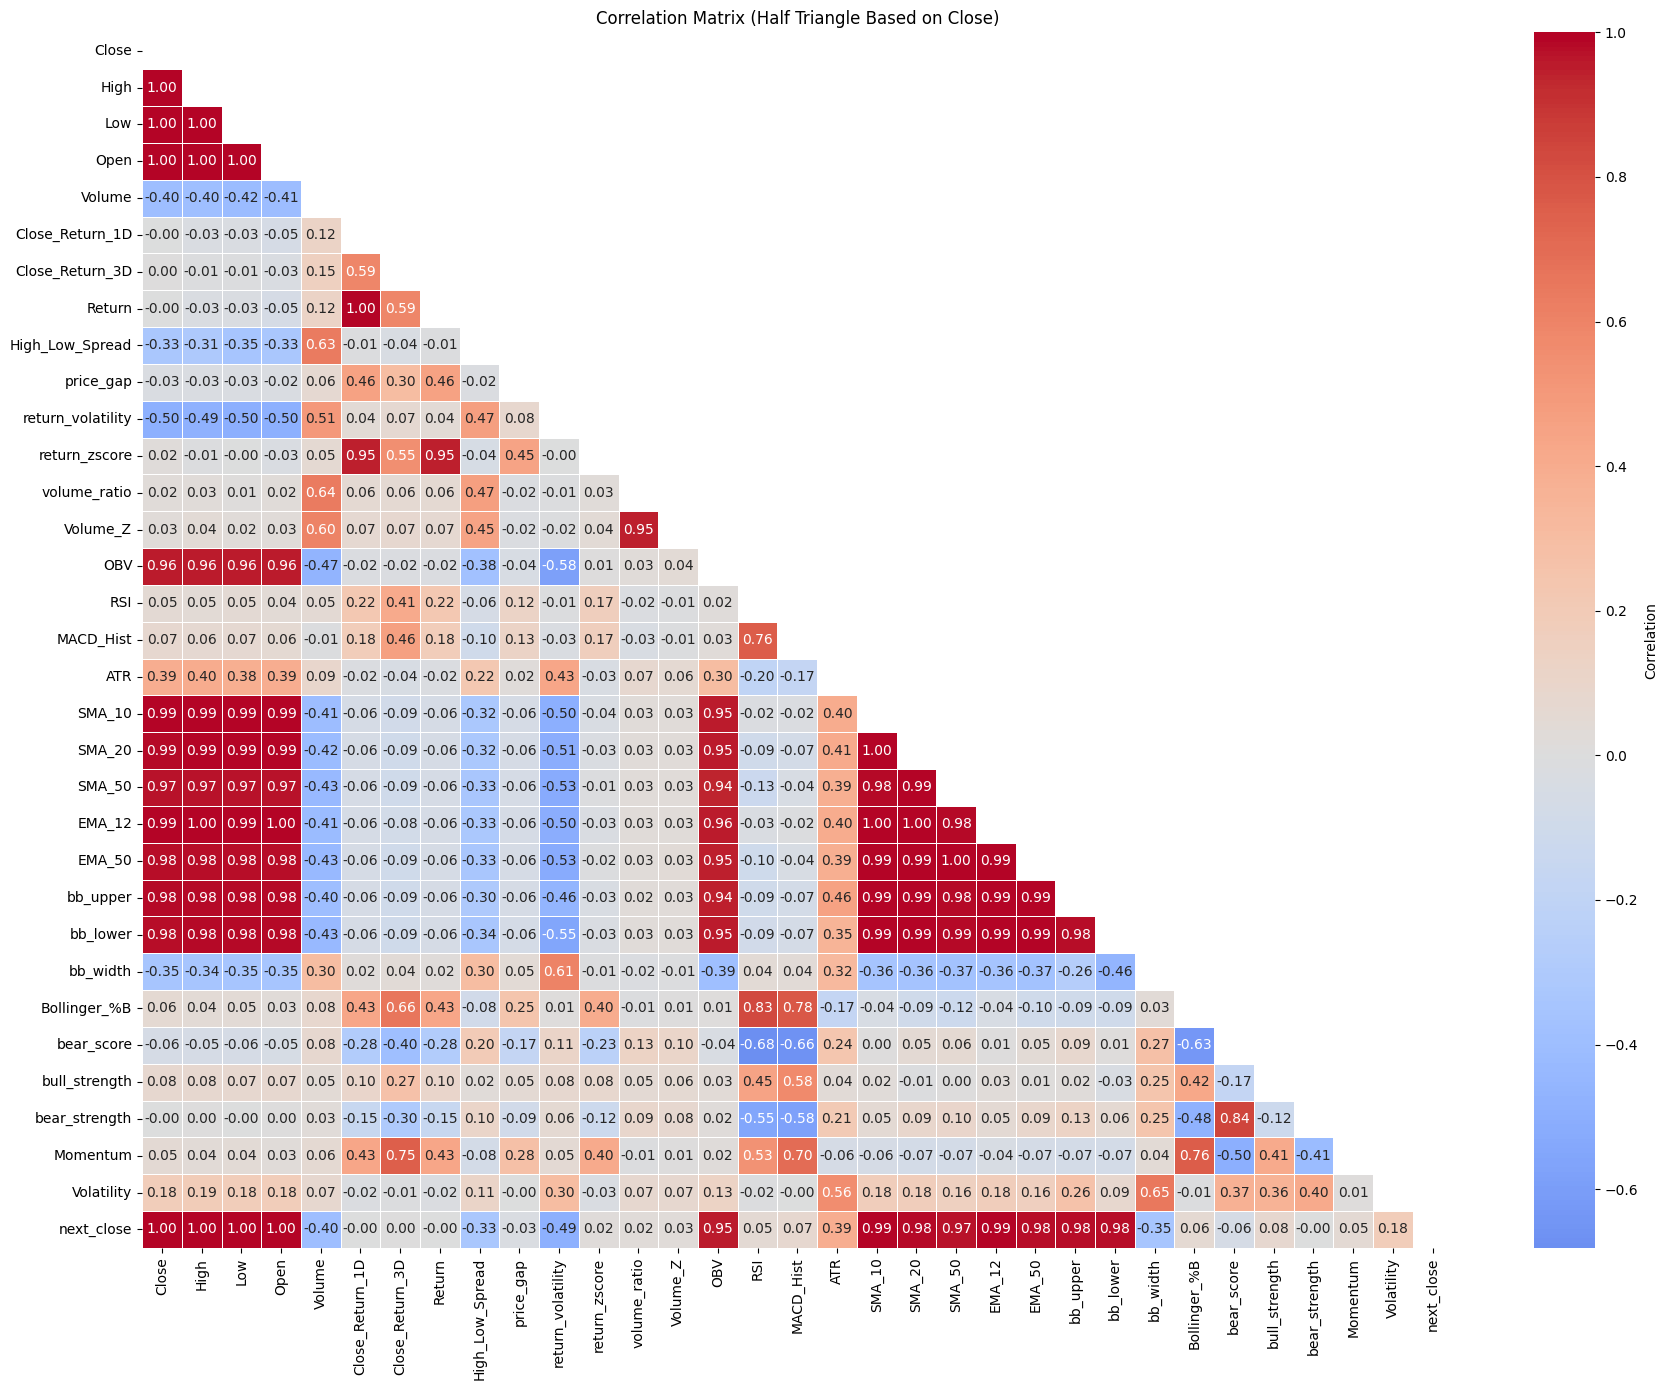

In [14]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Mask the upper triangle (for half triangle view)
mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap for correlations based on "Close" price (upper triangle masked)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5, mask=mask_upper, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix (Half Triangle Based on Close)')
plt.tight_layout()
plt.show()

Price Movement: "Close" price strongly correlates with "High," "Low," and "Open" prices.

Momentum: Recent returns (1D, 3D) show a strong correlation with "Close" price.

Volume: Higher volume correlates with price increases.

Moving Averages: Short-term moving averages (SMA_10, EMA_12) are closely related to "Close."

Bollinger Bands: "Close" is positively correlated with the upper band and negatively with the lower.

Other Indicators: Some, like MACD and RSI, show weaker or more complex relationships.

In short, recent price trends, volume, and moving averages are most closely linked to the "Close" price. 

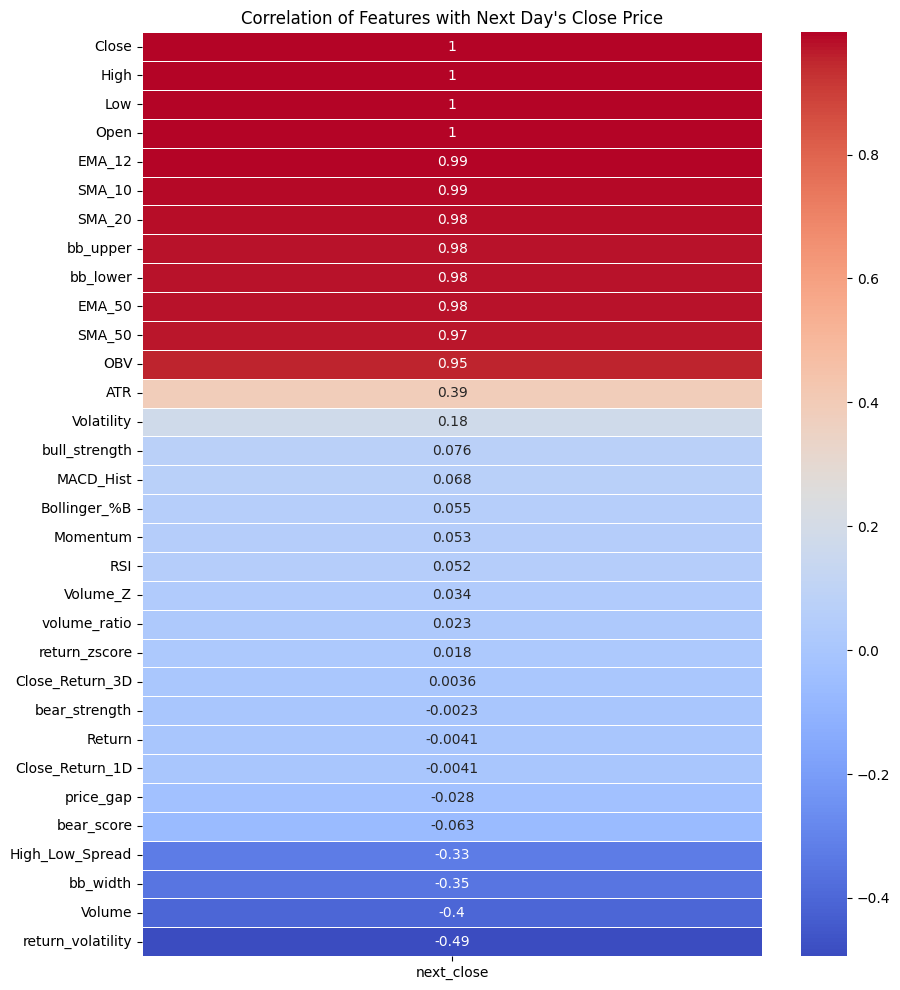

In [15]:
numeric_cols = df.select_dtypes(include='number').columns
correlations = df[numeric_cols].corr()['next_close'].sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.heatmap(correlations.drop('next_close').to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with Next Day's Close Price")
plt.show()

##### Based on next day correlation 
- Today's prices and recent trends (highs, lows, moving averages) are the most reliable predictors for tomorrow's closing price.
- If the stock is near the top of its recent range with strong buying pressure, it's likely to stay strong or rise.
- Higher volatility or wider price ranges today might hint at a pullback or a lower close tomorrow.


In [16]:
important_features = ['Close', 'Open', 'High', 'Low', 'EMA_12', 'SMA_10', 'SMA_20', 
                       'OBV', 'bb_upper', 'ATR', 'High_Low_Spread', 'Volume_Ratio', 
                       'Momentum', 'Return_Volatility', 'bb_width']
